In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

- Mounting Google drive and Loading the dataset to colab

In [ ]:
drive.mount('/content/gdrive')
data = pd.read_parquet("/content/gdrive/MyDrive/BeFreeTest/ds_test_data.parquet")
data

Mounted at /content/gdrive


,lender,loan_id,loan_instalment_id,amount_to_repay,amount_paid,payment_date,loan_status,loan_due_date,created_at
0,lender_003,8df97250-787a-4da3-8c6f-66d008a09803,fe99b579-d2d7-42b0-9ece-f556d343d85e,216.00,NaN,NaN,inactive,43157.0,2022-04-05 09:48:08.984
1,lender_004,6dbb5c42-51f1-44c3-841a-283b765b3ba4,df16876a-42e8-4486-8be8-a584d15a5dc0,1210.00,NaN,NaN,inactive,43171.0,2021-12-24 04:46:51.334
2,lender_003,879fe7e0-05b1-4063-8f6a-ce6abdcfd050,4930c6c5-a249-45e6-841f-9d8497440cba,2304.00,NaN,NaN,inactive,43496.0,2022-04-05 13:16:18.501
3,lender_004,2d8779ed-92a4-4865-9652-77c4ce7568a7,5661a7da-fe1a-43ac-8d30-f7032874c9f4,1815.00,NaN,NaN,inactive,43817.0,2021-12-24 05:55:55.769
4,lender_003,ac47ebd8-0660-439b-9e72-8a50d9cef013,4810c356-0280-48ad-ab78-16d659b44087,432.00,NaN,NaN,inactive,43362.0,2022-02-17 13:28:04.982
...,...,...,...,...,...,...,...,...,...
25557,lender_002,5713f316-941c-4be5-b9a8-d86f83f09a7b,b672cc0e-652a-40c1-9ee4-db3a7a29f85e,46800.00,5000.0,44359.0,inactive,44149.0,2021-03-01 18:46:20.113
25558,lender_002,2fb747d5-7b3d-4a1b-97f7-23e4a6cc9f0e,c990807b-7c3c-4f8a-80c5-789a9ef6b569,2400.00,NaN,NaN,inactive,44623.0,2022-03-14 12:03:28.265
25559,lender_007,00698c3d-78f7-4442-a01f-d6c71ed5b5e7,c8f07f55-9167-4f42-b2eb-68168c14aec2,7100.00,NaN,NaN,inactive,44799.0,2022-09-26 08:37:11.264
25560,lender_024,9e89dd1e-d981-4a39-9746-801c133c716a,62958207-45cf-49c0-b638-df1426398f20,9538649.48,NaN,NaN,inactive,43800.0,2022-08-29 12:58:48.683


# Accessing the Dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25562 entries, 0 to 25561
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   lender              25562 non-null  object        
 1   loan_id             25562 non-null  object        
 2   loan_instalment_id  25562 non-null  object        
 3   amount_to_repay     25553 non-null  float64       
 4   amount_paid         1473 non-null   float64       
 5   payment_date        1473 non-null   float64       
 6   loan_status         25562 non-null  object        
 7   loan_due_date       25342 non-null  float64       
 8   created_at          25562 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 1.8+ MB


In [ ]:
data.describe()

,amount_to_repay,amount_paid,payment_date,loan_due_date
count,2.555300e+04,1473.000000,1473.000000,25342.000000
mean,8.207964e+03,6516.885791,44795.803802,43726.567950
std,8.238797e+04,26746.494515,264.784547,1646.768932
min,0.000000e+00,0.000000,44095.000000,-1.000000
25%,8.528000e+02,50.000000,44641.000000,43374.000000
50%,2.034000e+03,726.000000,44749.000000,43625.000000
75%,4.517000e+03,3678.530000,45046.000000,44150.000000
max,9.538649e+06,483865.500000,45337.000000,45777.000000


In [ ]:
data.isnull().sum()

lender                    0
loan_id                   0
loan_instalment_id        0
amount_to_repay           9
amount_paid           24089
payment_date          24089
loan_status               0
loan_due_date           220
created_at                0
dtype: int64

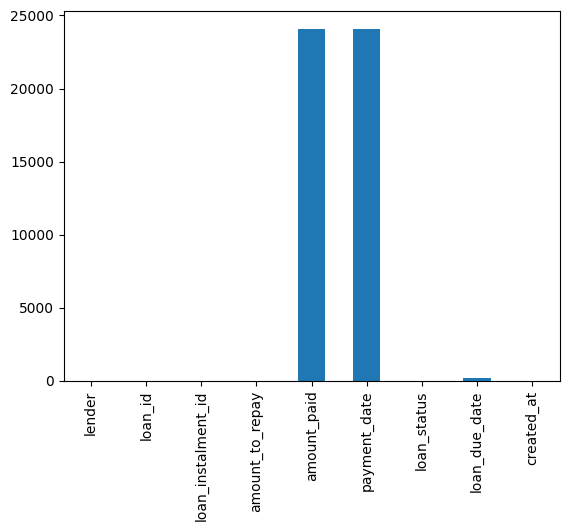

In [ ]:
data.isnull().sum().plot(kind = "bar");

In [ ]:
data.shape, data.loan_id.nunique(), data.loan_instalment_id.nunique() #checking the number of unique values present in the id's colus

((25562, 9), 25562, 25562)

- the above id columns shows that the values therein are all unique which is probabbly kay by which the individual datapoints are accessd from the datababse
- so we remove/drop those columns as it does not have any impart on the machine learning system we're working on.

In [ ]:
data.drop(["loan_id", "loan_instalment_id"], axis =1, inplace = True)

In [ ]:
data

,lender,amount_to_repay,amount_paid,payment_date,loan_status,loan_due_date,created_at
0,lender_003,216.00,NaN,NaN,inactive,43157.0,2022-04-05 09:48:08.984
1,lender_004,1210.00,NaN,NaN,inactive,43171.0,2021-12-24 04:46:51.334
2,lender_003,2304.00,NaN,NaN,inactive,43496.0,2022-04-05 13:16:18.501
3,lender_004,1815.00,NaN,NaN,inactive,43817.0,2021-12-24 05:55:55.769
4,lender_003,432.00,NaN,NaN,inactive,43362.0,2022-02-17 13:28:04.982
...,...,...,...,...,...,...,...
25557,lender_002,46800.00,5000.0,44359.0,inactive,44149.0,2021-03-01 18:46:20.113
25558,lender_002,2400.00,NaN,NaN,inactive,44623.0,2022-03-14 12:03:28.265
25559,lender_007,7100.00,NaN,NaN,inactive,44799.0,2022-09-26 08:37:11.264
25560,lender_024,9538649.48,NaN,NaN,inactive,43800.0,2022-08-29 12:58:48.683


#### From accessing the above dataset
- the Nan values in `amount paid column` simply means the lender did not pay, therfore wee can fill it with zeros, which still means they paid nothing
- the Nan values in the payment date will be filled with the loan due date, since that date is the expected date for the lender to redeem the laon

In [ ]:
# Convert the 'date_num' column to datetime
data['loan_due_date'] = pd.to_datetime(data['loan_due_date'], unit='D', origin='1900-01-01')
data["payment_date"] = pd.to_datetime(data['payment_date'], unit='D', origin='1900-01-01')
data["created_at"] = pd.to_datetime(data['created_at'])
data["amount_paid"].fillna(0, inplace = True) #fill the Nan values in the amount paid with zro


# Fill NaN values in 'due_date' with values from 'loan_due_date'
data['payment_date'] = data['payment_date'].fillna(data['loan_due_date'])

/usr/local/lib/python3.10/dist-packages/pandas/core/tools/datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)
/usr/local/lib/python3.10/dist-packages/pandas/core/tools/datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)


In [ ]:
data

,lender,amount_to_repay,amount_paid,payment_date,loan_status,loan_due_date,created_at
0,lender_003,216.00,0.0,2018-02-28,inactive,2018-02-28,2022-04-05 09:48:08.984
1,lender_004,1210.00,0.0,2018-03-14,inactive,2018-03-14,2021-12-24 04:46:51.334
2,lender_003,2304.00,0.0,2019-02-02,inactive,2019-02-02,2022-04-05 13:16:18.501
3,lender_004,1815.00,0.0,2019-12-20,inactive,2019-12-20,2021-12-24 05:55:55.769
4,lender_003,432.00,0.0,2018-09-21,inactive,2018-09-21,2022-02-17 13:28:04.982
...,...,...,...,...,...,...,...
25557,lender_002,46800.00,5000.0,2021-06-14,inactive,2020-11-16,2021-03-01 18:46:20.113
25558,lender_002,2400.00,0.0,2022-03-05,inactive,2022-03-05,2022-03-14 12:03:28.265
25559,lender_007,7100.00,0.0,2022-08-28,inactive,2022-08-28,2022-09-26 08:37:11.264
25560,lender_024,9538649.48,0.0,2019-12-03,inactive,2019-12-03,2022-08-29 12:58:48.683


In [ ]:
data.isnull().sum()

lender               0
amount_to_repay      9
amount_paid          0
payment_date       219
loan_status          0
loan_due_date      220
created_at           0
dtype: int64

In [ ]:
# fishing out the datapoints that has null values in the loan due date column and also checking their proportion
nullDueDate = data.query("loan_due_date == ''")
nullDueDate.isnull().sum()

lender               0
amount_to_repay      9
amount_paid          0
payment_date       219
loan_status          0
loan_due_date      220
created_at           0
dtype: int64

the prevailing null values in payment due date and loan due date are probably missing from the original records as I will be segmenting this data to use the the ones with complet values for the modelling and the subset with null values will be kept asside pending when i get the required values to fill up the missing space

In [ ]:
data.query("loan_due_date != ''")

,lender,amount_to_repay,amount_paid,payment_date,loan_status,loan_due_date,created_at
0,lender_003,216.00,0.0,2018-02-28,inactive,2018-02-28,2022-04-05 09:48:08.984
1,lender_004,1210.00,0.0,2018-03-14,inactive,2018-03-14,2021-12-24 04:46:51.334
2,lender_003,2304.00,0.0,2019-02-02,inactive,2019-02-02,2022-04-05 13:16:18.501
3,lender_004,1815.00,0.0,2019-12-20,inactive,2019-12-20,2021-12-24 05:55:55.769
4,lender_003,432.00,0.0,2018-09-21,inactive,2018-09-21,2022-02-17 13:28:04.982
...,...,...,...,...,...,...,...
25557,lender_002,46800.00,5000.0,2021-06-14,inactive,2020-11-16,2021-03-01 18:46:20.113
25558,lender_002,2400.00,0.0,2022-03-05,inactive,2022-03-05,2022-03-14 12:03:28.265
25559,lender_007,7100.00,0.0,2022-08-28,inactive,2022-08-28,2022-09-26 08:37:11.264
25560,lender_024,9538649.48,0.0,2019-12-03,inactive,2019-12-03,2022-08-29 12:58:48.683


In [ ]:
data.loan_status.unique()

array(['inactive', 'active'], dtype=object)

# Exploratory Data Analysis

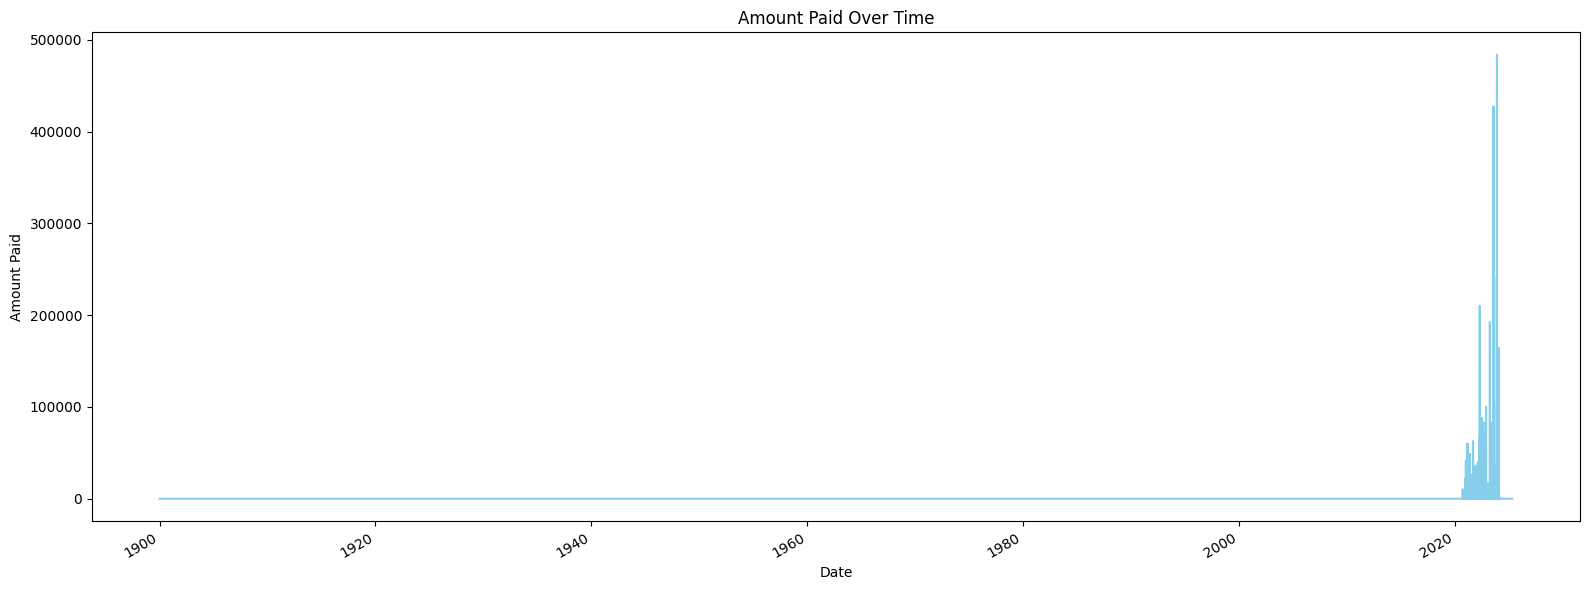

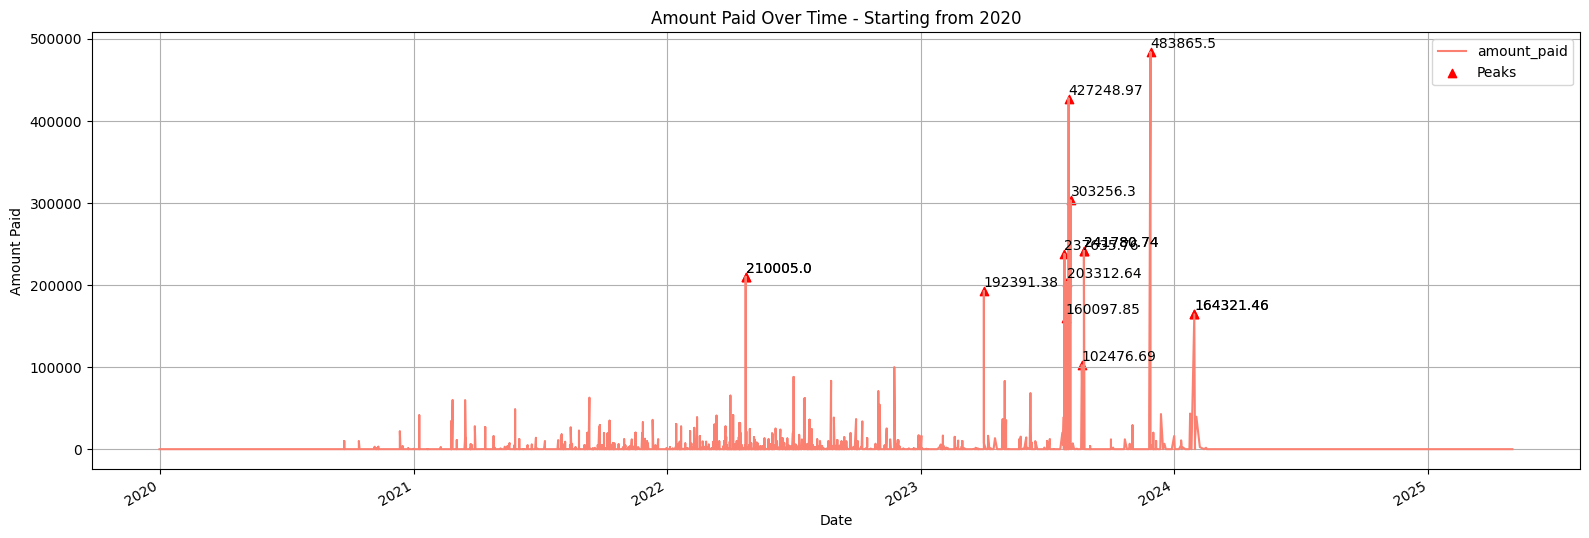

In [ ]:
# Time series plot of payment_date
plt.figure(figsize=(16, 6))
plt.subplot(1, 1, 1)
data.set_index('payment_date')['amount_paid'].plot(color='skyblue')
plt.title('Amount Paid Over Time')
plt.xlabel('Date')
plt.ylabel('Amount Paid')
plt.grid(False)
plt.tight_layout()
plt.show()


# Filter the DataFrame for dates starting from 2020
data_2020 = data[data['payment_date'].dt.year >= 2020]

# Time series plot of payment_date with logarithmic scale starting from 2020
plt.figure(figsize=(16, 10))

# Main plot
plt.subplot(2, 1, 1)
data_2020.set_index('payment_date')['amount_paid'].plot(color='salmon')
plt.title('Amount Paid Over Time - Starting from 2020')
plt.xlabel('Date')
plt.ylabel('Amount Paid')
plt.grid(True)

# Find peaks above 100000
peaks = data_2020[data_2020['amount_paid'] > 100000]

# Scatter plot for peaks
plt.scatter(peaks['payment_date'], peaks['amount_paid'], color='red', marker='^', label='Peaks')
for i, row in peaks.iterrows():
    plt.annotate(f'{row["amount_paid"]}', xy=(row['payment_date'], row['amount_paid']),
                 xytext=(row['payment_date'], row['amount_paid'] + 5000))

plt.legend()
plt.tight_layout()
plt.show()

The first chart illustrates the amount paid over time, ranging from 1900 to 2025. Upon closer inspection, there appears to be a flat line at the zero level from 1900 to 2020, indicating that lenders did not make any payments during this period. From 2020 onwards, the chart becomes more congested with values, indicating that all payments were made during this time frame.

In the second chart, which focuses on the period from 2020 onwards, markers were added to indicate peak values (assumed to be values above 100k). It is evident from this chart that the majority of payments were made between 2023 and 2024.

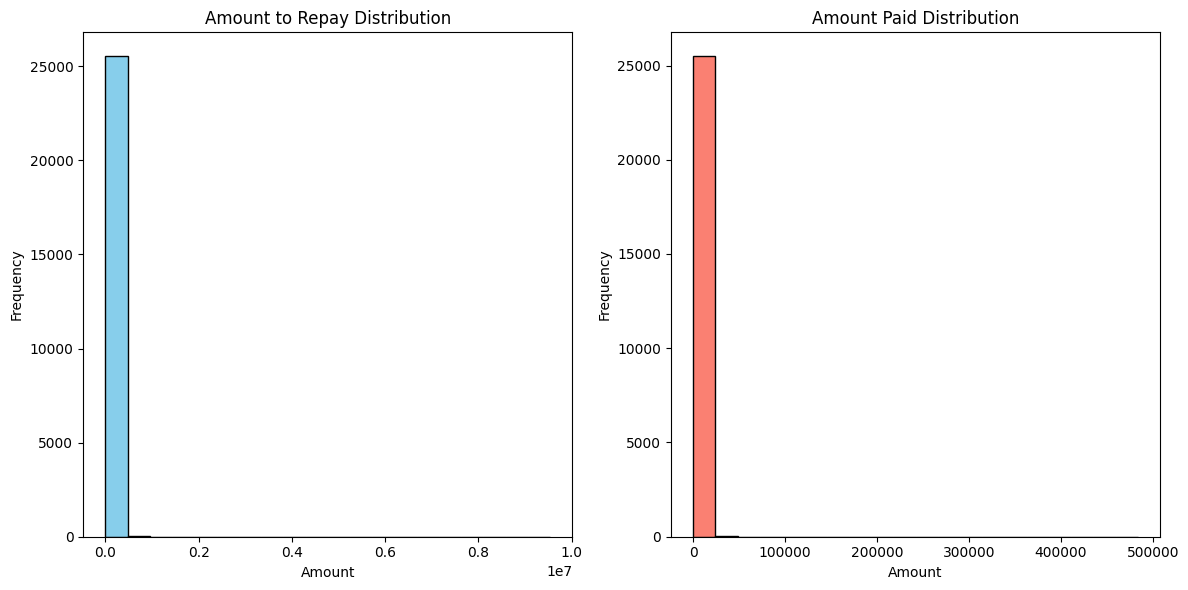

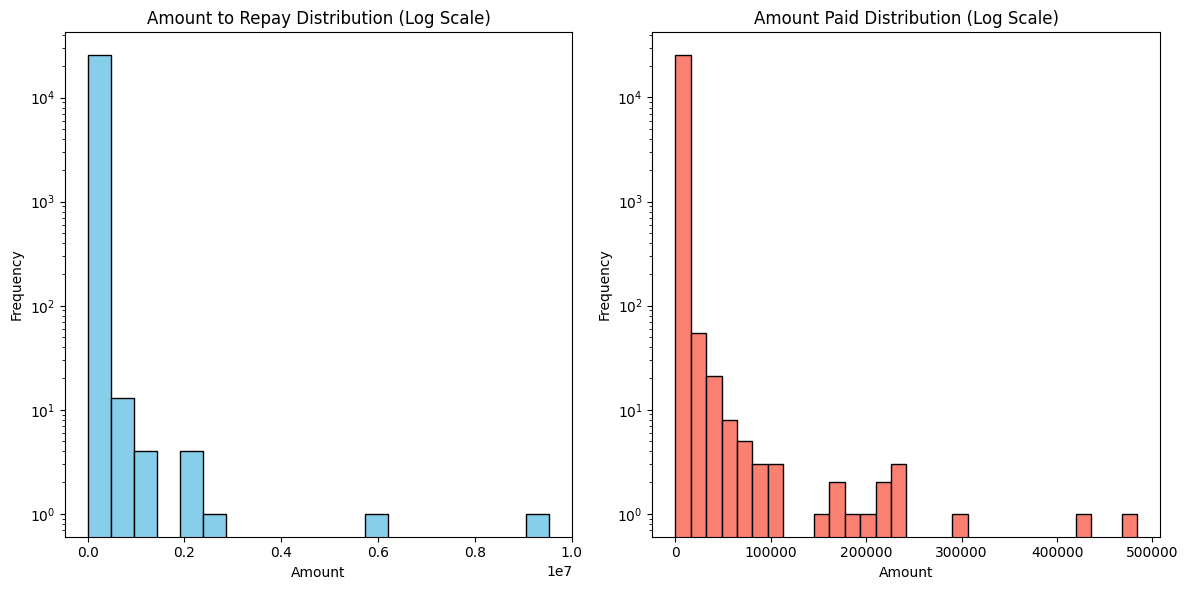

In [ ]:
# Plot histograms of amount_to_repay and amount_paid
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data['amount_to_repay'], bins=20, color='skyblue', edgecolor='black')
plt.title('Amount to Repay Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data['amount_paid'], bins=20, color='salmon', edgecolor='black')
plt.title('Amount Paid Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot histograms of amount_to_repay and amount_paid with log scale
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(data['amount_to_repay'], bins=20, color='skyblue', edgecolor='black')
plt.yscale('log')
plt.title('Amount to Repay Distribution (Log Scale)')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data['amount_paid'], bins=30, color='salmon', edgecolor='black')
plt.yscale('log')
plt.title('Amount Paid Distribution (Log Scale)')
plt.xlabel('Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The chart above illustrates the distributions of the amount to repay and the amount paid. The first two plots, due to the scale of the values, do not clearly represent the information. However, the last two plots, which are on a logarithmic scale, provide a clearer picture.
- The amount to repay chart indicates that the majority of lenders have amounts to repay between zero and two million, with a smaller number yet to repay six million and nine million, respectively. In contrast, the amount paid chart shows that most lenders have paid between zero and 100 thousand, with a smaller group having paid between 200 thousand. There is an even smaller population that has paid amounts between 30 and 50 thousand.

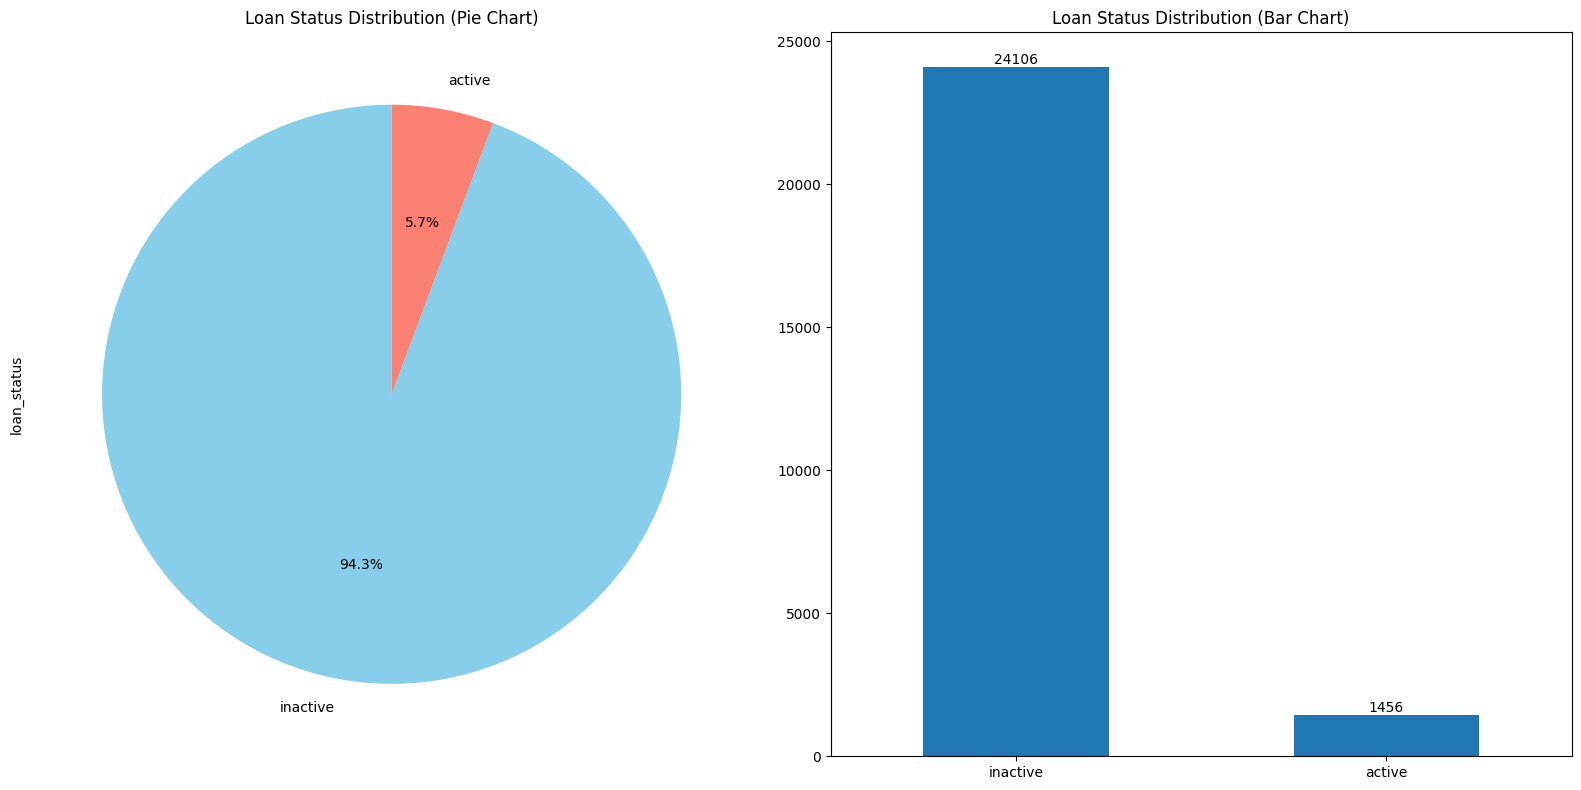

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots in the same row
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart of loan_status distribution
data['loan_status'].value_counts().plot.pie(ax=axs[0], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
axs[0].set_title('Loan Status Distribution (Pie Chart)')

# Bar chart of loan_status distribution with values at the top of each bar
counts = data['loan_status'].value_counts()
bar_plot = counts.plot.bar(ax=axs[1])
axs[1].set_title('Loan Status Distribution (Bar Chart)')
axs[1].set_ylabel('')
axs[1].set_xticklabels(counts.index, rotation=0)

# Add values at the top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 5),
                      textcoords='offset points')

plt.tight_layout()
plt.show()

The above chart show the distribution of the loan status, the pie chart shows the prcentage of distribution where active is 5.7 percent and inactive is 94.3 %
On the other hand the bar chart shows the distributions as well with the actual number of active and inactive lenders which are 1456 and 24106 respectively

In [ ]:
data.isnull().sum()

lender               0
amount_to_repay      9
amount_paid          0
payment_date       219
loan_status          0
loan_due_date      220
created_at           0
dtype: int64

In [ ]:
# Dropping off the null values before modelling
nullDueDate

,lender,amount_to_repay,amount_paid,payment_date,loan_status,loan_due_date,created_at
45,lender_006,2343.0,0.0,NaT,inactive,NaT,2022-07-04 14:44:20.594
109,lender_006,4360.0,0.0,NaT,inactive,NaT,2022-07-04 15:16:43.870
276,lender_006,4429.0,0.0,NaT,inactive,NaT,2022-07-04 15:19:17.182
322,lender_006,3447.0,0.0,NaT,inactive,NaT,2022-07-04 15:01:56.168
482,lender_006,6463.0,0.0,NaT,inactive,NaT,2022-07-04 15:29:08.005
...,...,...,...,...,...,...,...
24616,lender_001,NaN,0.0,NaT,active,NaT,2022-02-24 17:39:53.194
25092,lender_006,2143.0,0.0,NaT,inactive,NaT,2022-07-04 14:35:18.813
25099,lender_006,2654.0,0.0,NaT,inactive,NaT,2022-07-04 14:51:02.341
25167,lender_006,2918.0,0.0,NaT,inactive,NaT,2022-07-04 14:54:11.770


In [ ]:
df = data[~data['lender'].isin(nullDueDate['lender'])] # remove the nullDueDtate from the origanl data and asign it to df for modeling.

In [ ]:
df.isnull().sum()

lender             0
amount_to_repay    0
amount_paid        0
payment_date       0
loan_status        0
loan_due_date      0
created_at         0
dtype: int64

In [ ]:
df

,lender,amount_to_repay,amount_paid,payment_date,loan_status,loan_due_date,created_at
0,lender_003,216.00,0.0,2018-02-28,inactive,2018-02-28,2022-04-05 09:48:08.984
1,lender_004,1210.00,0.0,2018-03-14,inactive,2018-03-14,2021-12-24 04:46:51.334
2,lender_003,2304.00,0.0,2019-02-02,inactive,2019-02-02,2022-04-05 13:16:18.501
3,lender_004,1815.00,0.0,2019-12-20,inactive,2019-12-20,2021-12-24 05:55:55.769
4,lender_003,432.00,0.0,2018-09-21,inactive,2018-09-21,2022-02-17 13:28:04.982
...,...,...,...,...,...,...,...
25553,lender_002,5500.00,0.0,2019-11-12,active,2019-11-12,2024-02-04 19:51:44.535
25557,lender_002,46800.00,5000.0,2021-06-14,inactive,2020-11-16,2021-03-01 18:46:20.113
25558,lender_002,2400.00,0.0,2022-03-05,inactive,2022-03-05,2022-03-14 12:03:28.265
25560,lender_024,9538649.48,0.0,2019-12-03,inactive,2019-12-03,2022-08-29 12:58:48.683


# Feature Engineering
- the dept column is created from subtracting the amount the lenders redeemed from their original loan balance

In [ ]:
df["dept"] = df['amount_to_repay']-df['amount_paid']

<ipython-input-24-c31cb1305542>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dept"] = df['amount_to_repay']-df['amount_paid']


In [ ]:
df

,lender,amount_to_repay,amount_paid,payment_date,loan_status,loan_due_date,created_at,dept
0,lender_003,216.00,0.0,2018-02-28,inactive,2018-02-28,2022-04-05 09:48:08.984,216.00
1,lender_004,1210.00,0.0,2018-03-14,inactive,2018-03-14,2021-12-24 04:46:51.334,1210.00
2,lender_003,2304.00,0.0,2019-02-02,inactive,2019-02-02,2022-04-05 13:16:18.501,2304.00
3,lender_004,1815.00,0.0,2019-12-20,inactive,2019-12-20,2021-12-24 05:55:55.769,1815.00
4,lender_003,432.00,0.0,2018-09-21,inactive,2018-09-21,2022-02-17 13:28:04.982,432.00
...,...,...,...,...,...,...,...,...
25553,lender_002,5500.00,0.0,2019-11-12,active,2019-11-12,2024-02-04 19:51:44.535,5500.00
25557,lender_002,46800.00,5000.0,2021-06-14,inactive,2020-11-16,2021-03-01 18:46:20.113,41800.00
25558,lender_002,2400.00,0.0,2022-03-05,inactive,2022-03-05,2022-03-14 12:03:28.265,2400.00
25560,lender_024,9538649.48,0.0,2019-12-03,inactive,2019-12-03,2022-08-29 12:58:48.683,9538649.48


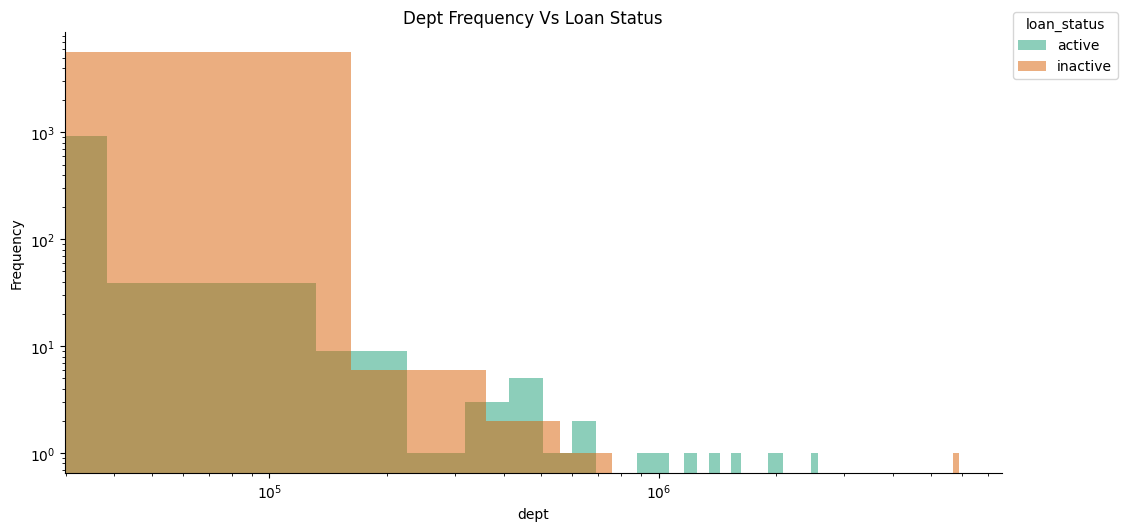

In [ ]:
import seaborn as sns
def _plot_hist(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    ys = series['dept']

    plt.hist(ys, bins=30, alpha=0.5, label=series_name, color=palette[series_index % len(palette)])

    # Find peaks above 2 million
    peaks = series[series['dept'] >= 2000000]
    plt.scatter(peaks['dept'], np.zeros_like(peaks['dept']), color='red', marker='^')
    for dept in peaks['dept']:
        plt.annotate(f'{dept}', xy=(dept, 0), xytext=(dept, 10000),
                     textcoords='offset points', ha='center', va='bottom')

fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)
df_sorted_2020 = df[df['payment_date'].dt.year >= 2020]
for i, (series_name, series) in enumerate(df_sorted_2020.groupby('loan_status')):
    _plot_hist(series, series_name, i)
fig.legend(title='loan_status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.title("Dept Frequency Vs Loan Status")
plt.xlabel('dept')
plt.ylabel('Frequency')
plt.yscale('log')  # Apply logarithmic scale to y-axis
plt.xscale('log')  # Apply logarithmic scale to y-axis
plt.show()

the above chat show the Frequency of debt of the lenders with respect to their loan status, the inactive people tends to be f higher population while the active lenders tends to be of lower distibution with higher dept values

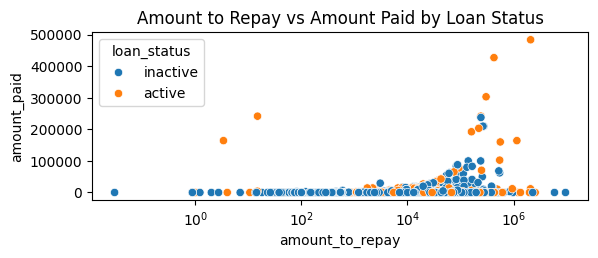

In [ ]:
plt.subplot(2,1,2)
sns.scatterplot(x='amount_to_repay', y='amount_paid', hue='loan_status', data=data)
plt.title('Amount to Repay vs Amount Paid by Loan Status')
plt.xscale('log')
plt.show()

The Inactive people tends to owe a siginificant amount of money compared to the active lenders
and then the active lenders are the ones making most of the payments as the values of the inactive lenders lies flat on the zero showing they are not repaying their loans

In [ ]:
#Encoding the laon status column, active -->1 and inactive -->0
df['loan_status'].replace({'active': 1, 'inactive': 0}, inplace = True)
df

<ipython-input-28-89792383b011>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan_status'].replace({'active': 1, 'inactive': 0}, inplace = True)


,lender,amount_to_repay,amount_paid,payment_date,loan_status,loan_due_date,created_at,dept
0,lender_003,216.00,0.0,2018-02-28,0,2018-02-28,2022-04-05 09:48:08.984,216.00
1,lender_004,1210.00,0.0,2018-03-14,0,2018-03-14,2021-12-24 04:46:51.334,1210.00
2,lender_003,2304.00,0.0,2019-02-02,0,2019-02-02,2022-04-05 13:16:18.501,2304.00
3,lender_004,1815.00,0.0,2019-12-20,0,2019-12-20,2021-12-24 05:55:55.769,1815.00
4,lender_003,432.00,0.0,2018-09-21,0,2018-09-21,2022-02-17 13:28:04.982,432.00
...,...,...,...,...,...,...,...,...
25553,lender_002,5500.00,0.0,2019-11-12,1,2019-11-12,2024-02-04 19:51:44.535,5500.00
25557,lender_002,46800.00,5000.0,2021-06-14,0,2020-11-16,2021-03-01 18:46:20.113,41800.00
25558,lender_002,2400.00,0.0,2022-03-05,0,2022-03-05,2022-03-14 12:03:28.265,2400.00
25560,lender_024,9538649.48,0.0,2019-12-03,0,2019-12-03,2022-08-29 12:58:48.683,9538649.48


# Performing Clustering on the dataset

In [ ]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Select features for clustering and classification
features = ['amount_to_repay', 'amount_paid', 'dept']

# Prepare data
X = df[features]
y = df['loan_status']

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

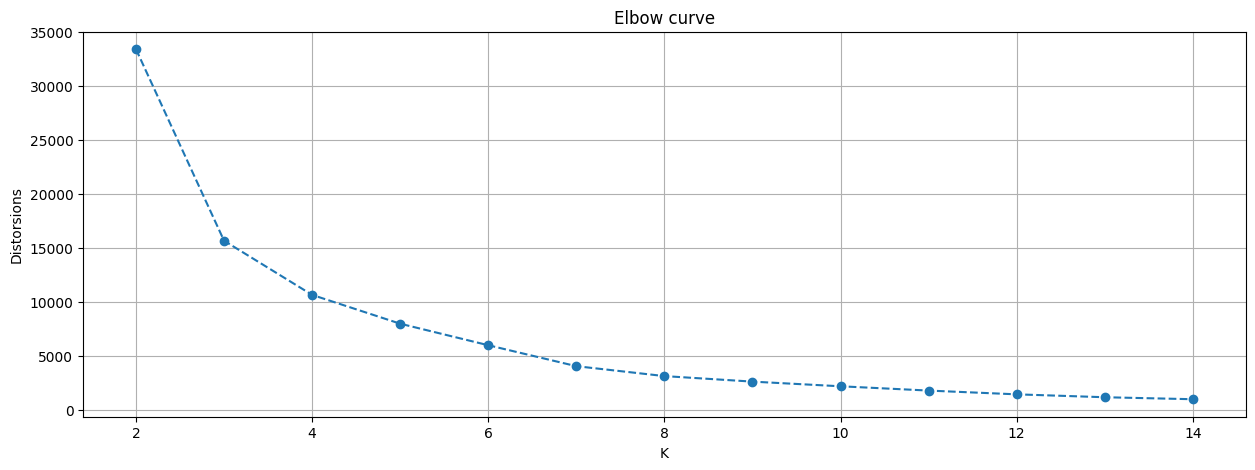

In [ ]:
#finding optimum k values
distorsions = []
for k in range(2, 15):
     kmeans = KMeans(n_clusters=k,init='k-means++',max_iter=300,n_init=10)
     kmeans.fit(X_scaled)
     distorsions.append(kmeans.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 15), distorsions,'o--')
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

froom the above chart using the elbow method, the convergence is between 3 and 4 and the when tested 3 appears to have a better defined clusters compared to 4.

In [ ]:
clusters_range = np.arange(2,15)
for cluster in clusters_range:
    kmeans = KMeans(n_clusters=cluster,init='k-means++',max_iter=300,n_init=10)
    kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_, metric='euclidean')
    print(f'for cluster: {cluster} --> Silhouetter Score: %.3f' % score)

for cluster: 2 --> Silhouetter Score: 0.998
for cluster: 3 --> Silhouetter Score: 0.996
for cluster: 4 --> Silhouetter Score: 0.995
for cluster: 5 --> Silhouetter Score: 0.995
for cluster: 6 --> Silhouetter Score: 0.980
for cluster: 7 --> Silhouetter Score: 0.980
for cluster: 8 --> Silhouetter Score: 0.981
for cluster: 9 --> Silhouetter Score: 0.980
for cluster: 10 --> Silhouetter Score: 0.980
for cluster: 11 --> Silhouetter Score: 0.958
for cluster: 12 --> Silhouetter Score: 0.958
for cluster: 13 --> Silhouetter Score: 0.917
for cluster: 14 --> Silhouetter Score: 0.949


In [ ]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
labels = kmeans.fit_predict(X_scaled)
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 1, 2], dtype=int32)

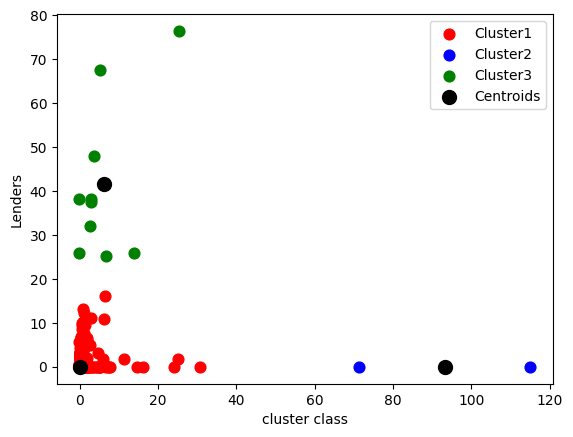

In [ ]:
plt.scatter(X_scaled[labels == 0, 0], X_scaled[labels == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(X_scaled[labels == 1, 0], X_scaled[labels == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(X_scaled[labels == 2, 0], X_scaled[labels == 2, 1], s = 60, c = 'green', label = 'Cluster3')
# plt.scatter(X_scaled[labels == 3, 0], X_scaled[labels == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
# plt.scatter(X_scaled[labels == 4, 0], X_scaled[labels == 4, 1], s = 60, c = 'yellow', label = 'Cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('cluster class')
plt.ylabel('Lenders')
plt.legend()

plt.show()

The above chart shows the 3 cluster from the K-mena model trained and sloe the black dot represent the centroids.

In [ ]:
from sklearn.metrics import davies_bouldin_score
models = {
    'K-means': KMeans(n_clusters=3, random_state=42),
    'DBSCAN': DBSCAN(eps=0.3, min_samples=5)
}

def clustering_metrics(X, models):
    results = []

    for model_name, model in models.items():
        pca = PCA(n_components=2)
        data_pca = pca.fit_transform(X)

        cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

        if model_name != 'GMM':
            labels = model.fit_predict(data_pca)
            silhouette_avg = silhouette_score(data_pca, labels)
            db_score = davies_bouldin_score(data_pca, labels)

            # Calculate Within-Cluster Sum of Squares (WCSS)
            kmeans = KMeans(n_clusters=len(np.unique(labels)))
            kmeans.fit(data_pca)
            wcss = kmeans.inertia_

            results.append({
                'Model': model_name,
                'Silhouette Score': silhouette_avg,
                'Davies-Bouldin Score': db_score,
                'WCSS': wcss,
            })
        else:
            label = model.fit_predict(data_pca)
            silhouette_avg = silhouette_score(data_pca, label)
            db_score = davies_bouldin_score(data_pca, label)

            # Calculate Within-Cluster Sum of Squares (WCSS)
            kmeans = KMeans(n_clusters=len(np.unique(label)))
            kmeans.fit(data_pca)
            wcss = kmeans.inertia_

            results.append({
                'Model': model_name,
                'Silhouette Score': silhouette_avg,
                'Davies-Bouldin Score': db_score,
                'WCSS': wcss,
            })

    df_results = pd.DataFrame(results)
    return df_results
clustering_metrics_df = clustering_metrics(X_scaled, models)
clustering_metrics_df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Model,Silhouette Score,Davies-Bouldin Score,WCSS
0,K-means,0.996027,0.377538,15689.602098
1,DBSCAN,0.948430,1.624040,8052.311512


1. **Silhouette Score**: This metric measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates better-defined clusters. In this case, K-means has a higher silhouette score (0.996027) compared to DBSCAN (0.948430), suggesting that K-means produces more well-defined clusters.

2. **Davies-Bouldin Score**: This metric evaluates the average similarity between each cluster and its most similar cluster, where a lower score indicates better clustering. K-means has a lower Davies-Bouldin score (0.377538) compared to DBSCAN (1.624040), indicating that K-means produces clusters that are more separated from each other.

3. **WCSS (Within-Cluster Sum of Squares)**: This metric is specific to K-means and measures the sum of squared distances between each point and its assigned centroid. A lower WCSS indicates better clustering. however K-means has a higher WCSS (15689.602098) compared to DBSCAN (8016.886781), suggesting that DBSCAN may have a better defined clusters.

- Based on these metrics, K-means appears to be the better clustering model for this dataset. It has higher silhouette scores, lower Davies-Bouldin scores, indicating that it produces more well-defined and separated clusters compared to DBSCAN.

In [ ]:
df['cluster'] = kmeans.fit_predict(X_scaled)
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-37-b7bda2fa740c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(X_scaled)


,lender,amount_to_repay,amount_paid,payment_date,loan_status,loan_due_date,created_at,dept,cluster
0,lender_003,216.00,0.0,2018-02-28,0,2018-02-28,2022-04-05 09:48:08.984,216.00,0
1,lender_004,1210.00,0.0,2018-03-14,0,2018-03-14,2021-12-24 04:46:51.334,1210.00,0
2,lender_003,2304.00,0.0,2019-02-02,0,2019-02-02,2022-04-05 13:16:18.501,2304.00,0
3,lender_004,1815.00,0.0,2019-12-20,0,2019-12-20,2021-12-24 05:55:55.769,1815.00,0
4,lender_003,432.00,0.0,2018-09-21,0,2018-09-21,2022-02-17 13:28:04.982,432.00,0
...,...,...,...,...,...,...,...,...,...
25553,lender_002,5500.00,0.0,2019-11-12,1,2019-11-12,2024-02-04 19:51:44.535,5500.00,0
25557,lender_002,46800.00,5000.0,2021-06-14,0,2020-11-16,2021-03-01 18:46:20.113,41800.00,0
25558,lender_002,2400.00,0.0,2022-03-05,0,2022-03-05,2022-03-14 12:03:28.265,2400.00,0
25560,lender_024,9538649.48,0.0,2019-12-03,0,2019-12-03,2022-08-29 12:58:48.683,9538649.48,1


# Building Classification Model
-  Decision Tree Classifier
-  Random Forest Classifier
-  Logistic Regression



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Funtion FOr Validating model performance
def evaluate_model(y_val, y_pred):
  """Function to evaluate model and return the metric of the model

  It returns a dictionary with the classification metrics.
  """
  accuracy = accuracy_score(y_val, y_pred)
  precision = precision_score(y_val, y_pred, average='macro')
  recall = recall_score(y_val, y_pred, average='macro')
  f1 = f1_score(y_val, y_pred, average='macro')
  result = {"accuracy_score": accuracy,
            "precision_score": precision,
            "recall_score": recall,
            "f1_score": f1}
  return result

def plot_confusion_matrix(y_val, y_pred, label):
    '''function to plot confusion matrix

    Args
    y_val: array. The validation set of the target variable.
    y_pred: array. Model's prediction.
    label: list. A list containing all the classes in the target variable

    Returns
    It returns a plot of the confusion matrix
    '''
    cm = confusion_matrix(y_val, y_pred)
    fig, ax = plt.subplots(figsize=(10,10))
    ConfusionMatrixDisplay(cm, display_labels=label).plot(ax=ax, values_format='')
    plt.xticks(rotation ="vertical")
    plt.show()

# class labels
label = ["Active", "Inactive"]

In [ ]:
# Data Segementation
# Split the data into Training and testing for classification
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

- Decision Tree Algorithm

{'accuracy_score': 0.9686678352322524, 'precision_score': 0.8429699159531852, 'recall_score': 0.7801830947504639, 'f1_score': 0.8080136585957051}
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4349
           1       0.71      0.57      0.63       215

    accuracy                           0.97      4564
   macro avg       0.84      0.78      0.81      4564
weighted avg       0.97      0.97      0.97      4564



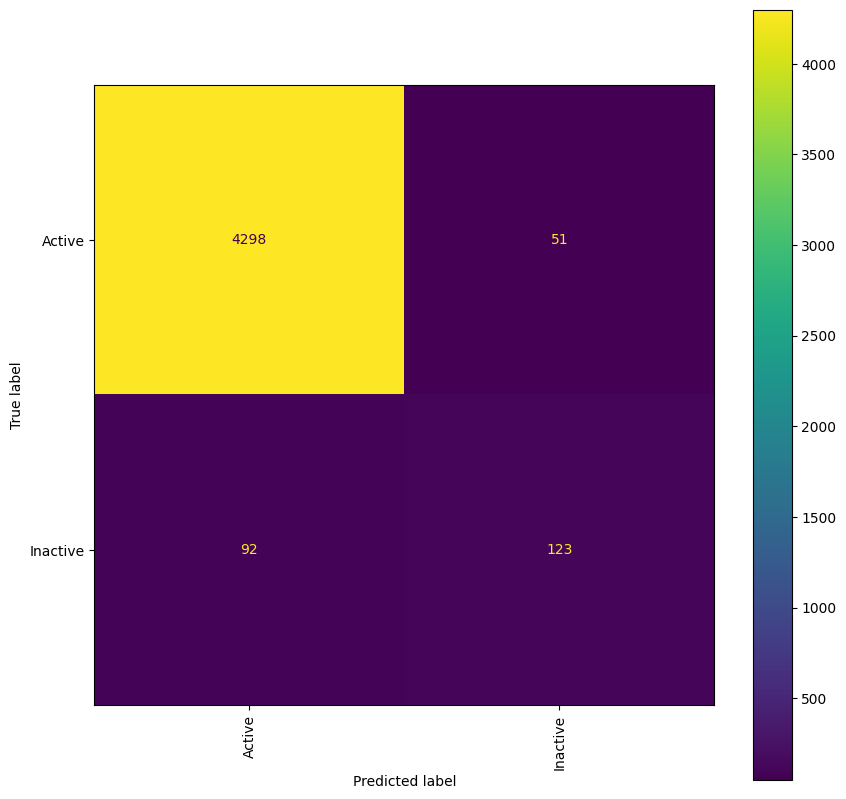

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(criterion="entropy")
decision_tree_model.fit(X_train, y_train)
decision_tree_y_pred = decision_tree_model.predict(X_test)

print(evaluate_model(y_test, decision_tree_y_pred))
print(classification_report(y_test, decision_tree_y_pred))
plot_confusion_matrix(y_test, decision_tree_y_pred, label)

The model we developed to predict lender activity achieved a high accuracy of 96.98%, indicating its effectiveness in making correct predictions. For active lenders, the model performed well, with a precision of 85.22% and a recall of 78.30%. However, its performance was lower for inactive lenders, This suggests that while the model is strong in identifying active lenders, it may need improvement in identifying inactive ones.

- Random Forest Classifier Algorithm

{'accuracy_score': 0.9704206836108676, 'precision_score': 0.8537229634540482, 'recall_score': 0.7921559086023517, 'f1_score': 0.8196399649080388}
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4349
           1       0.73      0.60      0.65       215

    accuracy                           0.97      4564
   macro avg       0.85      0.79      0.82      4564
weighted avg       0.97      0.97      0.97      4564



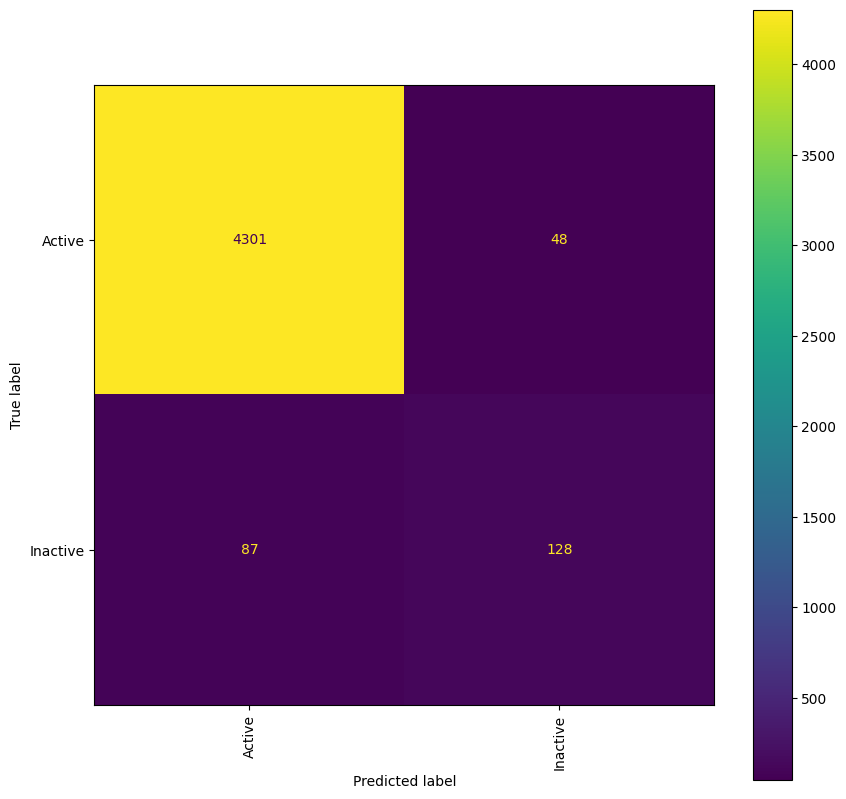

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=200,
                                             criterion="entropy")
random_forest_model.fit(X_train, y_train)
random_forest_y_pred = random_forest_model.predict(X_test)

print(evaluate_model(y_test, random_forest_y_pred))
print(classification_report(y_test, random_forest_y_pred))
plot_confusion_matrix(y_test, random_forest_y_pred, label)

The model we developed to predict lender activity achieved a high accuracy of 97.04%, indicating its effectiveness in making correct predictions. For active lenders, the model performed well, with a precision of 85.37% and a recall of 79.21%. However havent perfromed better than the Decision Tree Algorithm, its performance was still lower for inactive lenders, This suggests that while the model is strong in identifying active lenders, it may need improvement in identifying inactive ones.

# Feature Scaling For Logistic Regression
I scaled the features for logistic regression to ensure that the algorithm performs optimally. Logistic regression uses a linear combination of features, and scaling helps in bringing all features to a similar scale, which can improve convergence and speed up the training process.

However, random forest and decision tree algorithms are not sensitive to feature scaling because they make decisions based on feature thresholds, rather than the scale of the features. Therefore, scaling is not necessary for these algorithms.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_test)
print(scaled_X_train)
print(scaled_X_val)
print(len(scaled_X_train))
print(len(scaled_X_val))

[[-0.07006947 -0.04423002 -0.06666062]
 [-0.07033936 -0.04423002 -0.0669364 ]
 [-0.07017068 -0.04423002 -0.06676404]
 ...
 [-0.07006947 -0.04423002 -0.06666062]
 [-0.05576539 -0.04423002 -0.05204423]
 [-0.00629149 -0.04423002 -0.00149011]]
[[ 0.3827019  -0.04423002  0.39599659]
 [-0.02992358 -0.04423002 -0.02563819]
 [-0.01204348 -0.04423002 -0.00736769]
 ...
 [ 1.49241496  0.72758759  1.44375765]
 [-0.08781462 -0.04423002 -0.08479323]
 [ 0.07916864 -0.04423002  0.08583597]]
18256
4564


Classification Accuracy: 0.9531113058720421
{'accuracy_score': 0.9531113058720421, 'precision_score': 0.7767492871243693, 'recall_score': 0.506746806269284, 'f1_score': 0.5016246887373964}
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      4349
           1       0.60      0.01      0.03       215

    accuracy                           0.95      4564
   macro avg       0.78      0.51      0.50      4564
weighted avg       0.94      0.95      0.93      4564



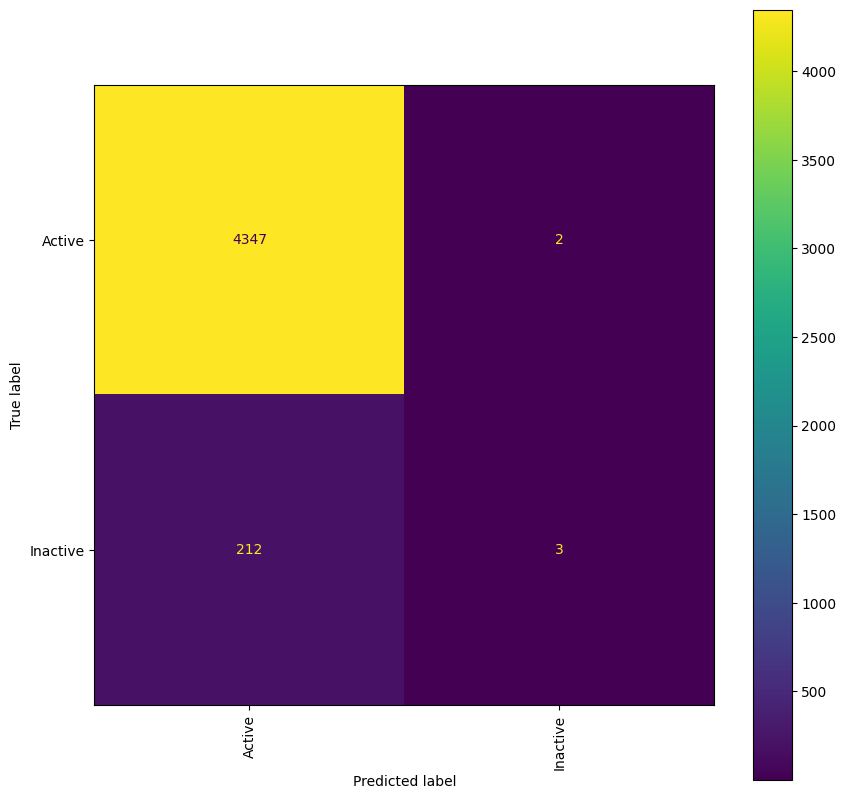

In [ ]:
# Perform classification
Logistic_regression_model = LogisticRegression(random_state=42)
Logistic_regression_model.fit(scaled_X_train, y_train)
y_pred = Logistic_regression_model.predict(scaled_X_val)

# Evaluate the classification performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Classification Accuracy: {accuracy}')
print(evaluate_model(y_test, y_pred))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, label)

The logistic regression model achieved an accuracy of 95.31%. However, it struggled to predict inactive lenders, with a precision of 0.60 and a recall of 0.01, indicating that it identified only 60% of predicted inactive lenders but missed 99% of actual inactive lenders.

# Feature Importance
- checcking the impact of each of the feature used in training the above models

In [ ]:
def plot_feature_importances(model, X):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0])
    else:
        raise ValueError("Model does not have attribute 'feature_importances_' or 'coef_'.")

    # Get feature names
    feature_names = X.columns.tolist()

    # Sort indices based on importances
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")
    for f in range(X.shape[1]):
        print("%d. feature %d (%f) - %s" % (f + 1, indices[f], importances[indices[f]], feature_names[indices[f]]))

    # Plot the feature importances
    plt.figure(figsize=(8, 6))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
            color="b", align="center")
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.tight_layout()
    plt.show()

Feature ranking:
1. feature 0 (0.532642) - amount_to_repay
2. feature 2 (0.429009) - dept
3. feature 1 (0.038349) - amount_paid


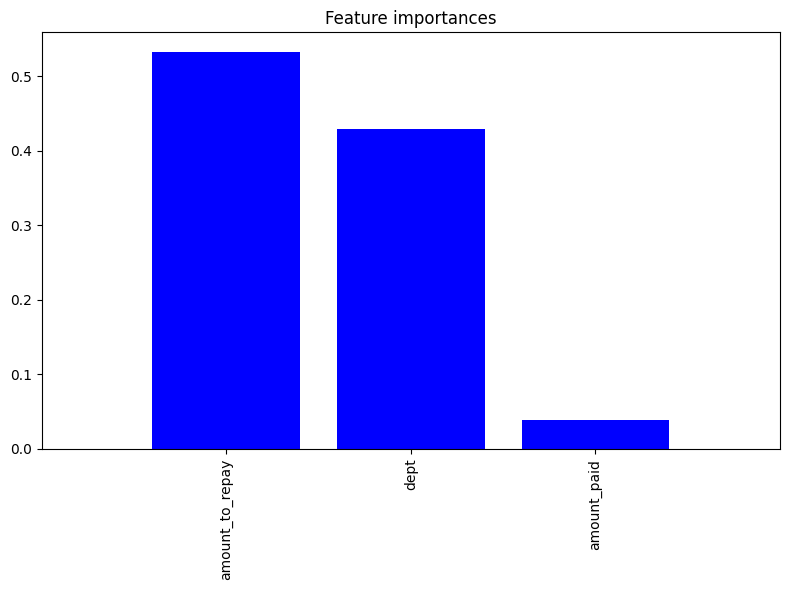

In [ ]:
plot_feature_importances(decision_tree_model, X)

In the decision tree classifier above, amount_to_repay is the most important feature (0.555), followed by dept (0.414), and then amount_paid (0.031). This indicates that the decision tree relied heavily on the amount to be repaid for its splits.

Feature ranking:
1. feature 1 (0.301067) - amount_paid
2. feature 0 (0.121782) - amount_to_repay
3. feature 2 (0.090823) - dept


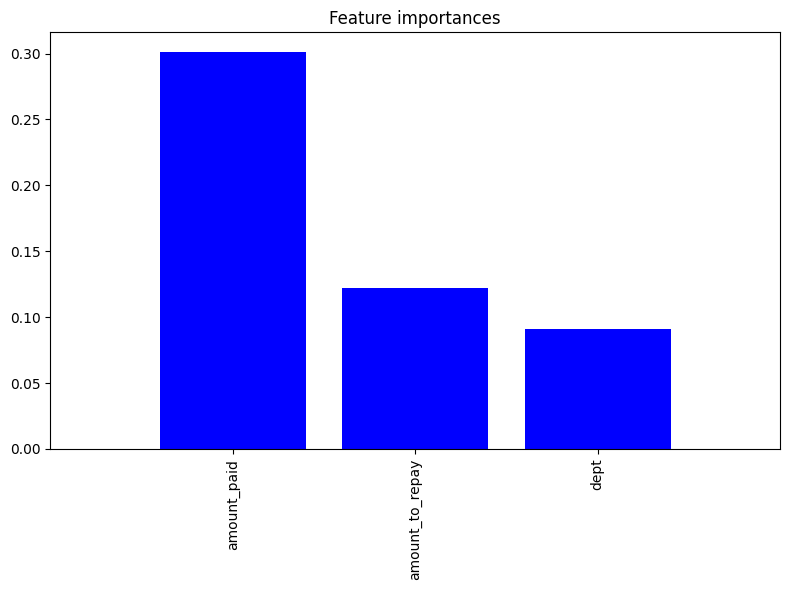

In [ ]:
plot_feature_importances(Logistic_regression_model, X)

For the logistic regression model, the most important feature was amount_paid, followed by amount_to_repay and dept, with importance scores of 0.301, 0.122, and 0.091, respectively. This suggests that the amount already paid is the most influential factor in predicting the outcome.

Feature ranking:
1. feature 0 (0.482135) - amount_to_repay
2. feature 2 (0.471144) - dept
3. feature 1 (0.046721) - amount_paid


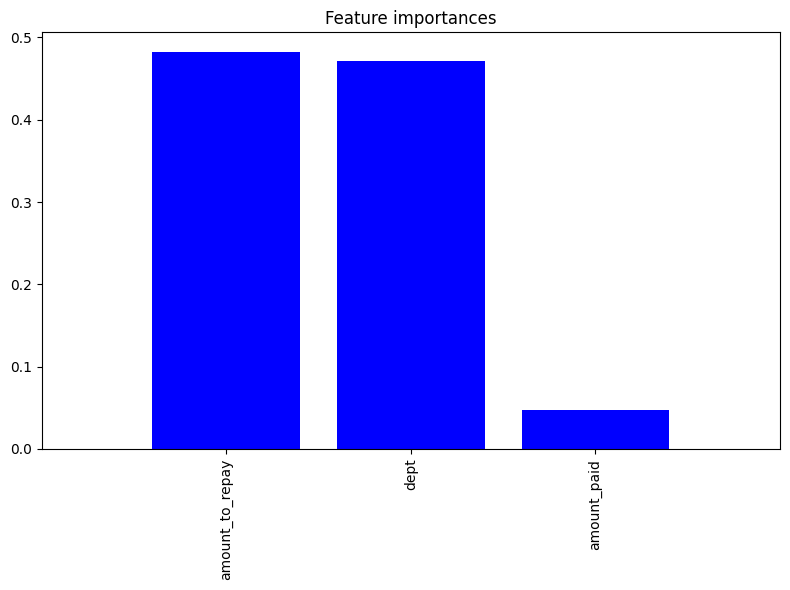

In [ ]:
plot_feature_importances(random_forest_model, X)

Similarly, the random forest model found amount_to_repay to be the most important feature (0.489), followed closely by dept (0.462), and then amount_paid (0.049). This suggests that both the decision tree and random forest models consider the amount to be repaid as the most critical feature in determining the outcome, while the logistic regression model places more emphasis on the amount already paid.

# Forcast on amount to repay vs Payment date Using ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Select the columns to forcast from the original Dataset
dfF = df.iloc[:,:-6]
dfF.drop("lender", axis = 1, inplace = True)

In [ ]:
dfF.reset_index(inplace = True)
dfF

,payment_date,amount_to_repay
0,2018-02-28,216.00
1,2018-03-14,1210.00
2,2019-02-02,2304.00
3,2019-12-20,1815.00
4,2018-09-21,432.00
...,...,...
22815,2019-11-12,5500.00
22816,2021-06-14,46800.00
22817,2022-03-05,2400.00
22818,2019-12-03,9538649.48


In [ ]:
# Set 'payment_date' as the index
dfF.set_index('payment_date', inplace=True)

# Split the data into training and test sets
train_size = int(len(dfF) * 0.8)
train, test = dfF.iloc[:train_size], dfF.iloc[train_size:]


# Fit ARIMA
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Forecast
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)

#  model results
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:        amount_to_repay   No. Observations:                18256
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -182125.620
Date:                Tue, 26 Mar 2024   AIC                         364263.241
Time:                        15:02:49   BIC                         364310.114
Sample:                             0   HQIC                        364278.644
                              - 18256                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8375      0.005   -160.032      0.000      -0.848      -0.827
ar.L2         -0.6644      0.006   -107.575      0.000      -0.677      -0.652
ar.L3         -0.5038      0.006    -78.461      0.0

The SARIMAX model was applied to the dataset containing 18256 observations of the 'amount_to_repay' variable. The model was specified with an ARIMA(5, 1, 0) configuration, indicating the use of autoregressive terms of lag 1 to 5 and a first-order differencing to make the series stationary. The model's log likelihood was -182125.620, and the Akaike Information Criterion (AIC) was 364263.241, indicating a good fit. The coefficients for the autoregressive terms (ar.L1 to ar.L5) were all negative, with the largest magnitude at ar.L1 (-0.8375). The model's residuals showed no autocorrelation up to lag 1 (Ljung-Box test Q=10.34, p=0.00). However, the Jarque-Bera test for normality of residuals was significant (JB=1248328.53, p=0.00), indicating a departure from normality. The model's heteroskedasticity test was insignificant (H=0.91, p=0.00), suggesting homoscedasticity of residuals.

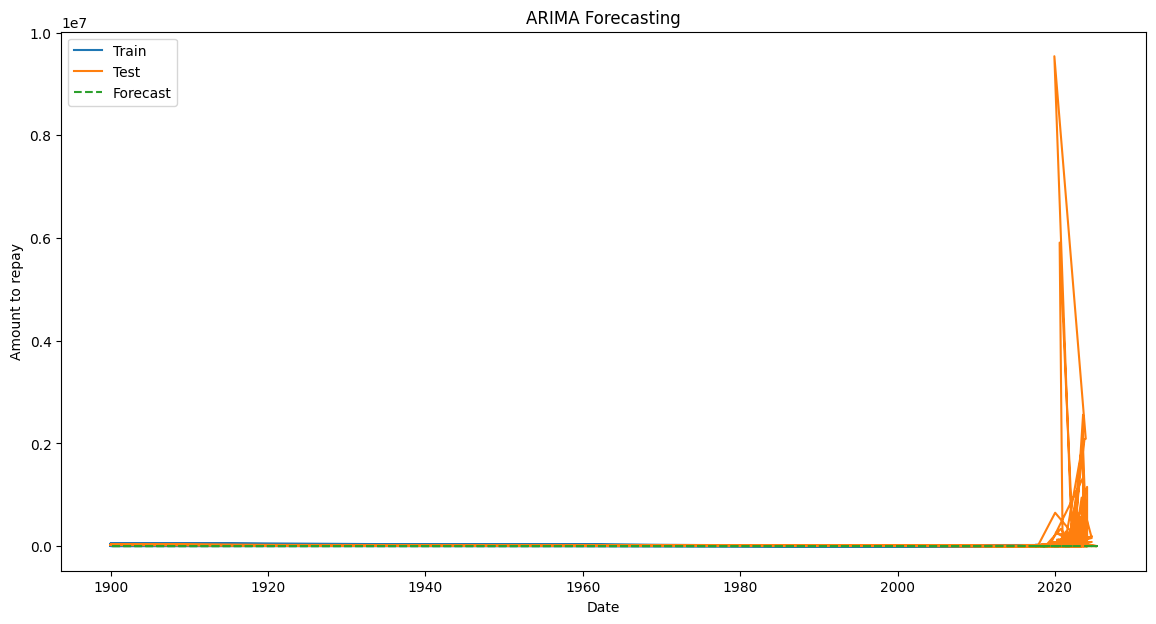

In [ ]:
# Plot actual vs forecast
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['amount_to_repay'], label='Train')
plt.plot(test.index, test['amount_to_repay'], label='Test')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Amount to repay')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show()


The model's heteroskedasticity test was insignificant (H=0.91, p=0.00), suggesting homoscedasticity of residuals.
therefore the residual non-normality suggests futher investigations which I could not meetup with considering my time frames with respect to when I got this task.